In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

epsilon_values = [0.05, 0.10, 0.25]

In [35]:
def read_data(file_path):
    column_data = {}
    #Read an csv file into a pandas DataFrame
    df = pd.read_csv(file_path,header=None)

    # The column labels of the DataFrame
    columns = df.columns   
    total_size = df.size
    #b = df.shape
    
    #record the data to list in column
    for column in columns:
        column_data[column] = df[column].tolist()
        
    return columns,total_size,column_data

#------------------------------------------------ below is question 3--------------------------------
def calculate_diff(columns,column_data):
    
    transmit_message = {}
    total_message = 0 

    for column in columns:
        count = 0 
        stale_value = None
        
        #calculate the difference
        for value in column_data[column]:
             if value != stale_value:
                count += 1
                stale_value = value
             else:
                stale_value = value

        transmit_message[column] = count
        total_message += count
    
    return total_message
#------------------------------------------------ above is question 3-------------------------------- 

#------------------------------------------------ below is question 4--------------------------------
def calculate_ε_far_diff(columns,column_data,epsilon_values):
    
    messages_sum = []#record answer for question 4
    
    messages = []#record message for each epsilon
    error_values = []#record error for each epsilon
    
    for epsilon in epsilon_values:

        message_list = [] #record message for each node
        total_message_2 = 0 #total message transmitted
        last_value_history = {}#record last_value
        error_list = [] #record error for each node

        for column in columns:
            count = 0 
            is_first_round = True
            last_value = 0.0
            last_value_history[column] = []
            message_count = []#message for each round
            node_error = []#record error for each round
            error = 0

            #计算current 和 last不相等的数量
            for value in column_data[column]:        
                if is_first_round:
                    last_value = value
                    is_first_round = False            
                else:
                    #print(last_value)
                    if abs(value - last_value) / abs(last_value) > epsilon:
                        count += 1
                        last_value = value
                    else:
                        last_value = last_value

                last_value_history[column].append(last_value)
                message_count.append(count)#message transmitted for all rounds

                error = abs(value - last_value)#calculate error for each data
                node_error.append(error)#errors for all rounds

            message_list.append(message_count)#errors for all nodes
            error_list.append(node_error)#errors for all nodes


            total_message_2 += count#sum to get total messages transmitted

        messages_sum.append(total_message_2)
        messages.append(message_list)
        error_values.append(error_list)#errors for all epsilon
    
    return messages_sum,messages,error_values
#------------------------------------------------ above is question 4-------------------------------- 

#------------------------------------------------ below is question 5--------------------------------
def calculate_MAE(error_values):
    MAE_values = []
    for epsilon in error_values:
        error_sum = 0
        error_count = 0

        # calculate total error
        for i in epsilon:
            for j in i:
                error_sum += j
                error_count += 1

        # calculaye MAE
        MAE = error_sum / error_count
        MAE_values.append(MAE)
        
    return MAE_values
#------------------------------------------------ above is question 5--------------------------------

#------------------------------------------------ below is question 6--------------------------------
def calculate_MAE_at_C(error_values):
    
    MAE_C = []
    for epsilon in error_values:
        MAE_allnodes = []
        transposed_epsilon = [list(row) for row in zip(*epsilon)]

        for i in transposed_epsilon:

            error_sum = 0
            error_count = 0

            for j in i:
                error_sum += j
                error_count += 1
            MAE = error_sum / error_count
            MAE_allnodes.append(MAE)
        MAE_C.append(MAE_allnodes)
    return MAE_C

def calculate_messages_at_C(messages):
    messages_C = []
    for epsilon in messages:
        messages_allnodes = []
        transposed_messages = [list(row) for row in zip(*epsilon)]

        for i in transposed_messages:
            message_sum = 0
            for j in i:
                message_sum += j
            messages_allnodes.append(message_sum)
        messages_C.append(messages_allnodes)
    return messages_C
#---------------------------------------------- above is question 6-----------------------------

#---------------------------------------------- plot-----------------------------
def plot_mae_and_messages(epsilon_values,MAE_C,messages_C):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # MAE
    axes[0].set_title('MAE at C for Different ε')
    axes[0].set_xlabel('Time(s)')
    axes[0].set_ylabel('MAE')

    # moving avg for last 30s
    window_size = 10
    for i, epsilon in enumerate(epsilon_values):
        mae_values = MAE_C[i]
        moving_average = np.convolve(mae_values, np.ones(window_size)/window_size, mode='valid')

        x1 = np.arange(0, 1992)
        x2 = np.arange(1992, 2022)
        y1 = mae_values[:1992]
        y2 = moving_average[-30:]

        axes[0].plot(x1, y1, label=f'ε={epsilon}')
        axes[0].plot(x2, y2)

    axes[0].legend()
    axes[0].grid(True)

    # messages
    axes[1].set_title('Messages at C for Different ε')
    axes[1].set_xlabel('Time(s)')
    axes[1].set_ylabel('Message count')

    for i, epsilon in enumerate(epsilon_values):
        axes[1].plot(np.arange(len(messages_C[i])), messages_C[i], label=f'ε={epsilon}')

    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
#---------------------------------------------- plot-----------------------------


question 2：1455840
question 3：743865
question 4-1: 73396
question 4-2: 36305
question 4-3: 14915
[0.9898023924483188, 1.9060127622164582, 4.181591932399125]


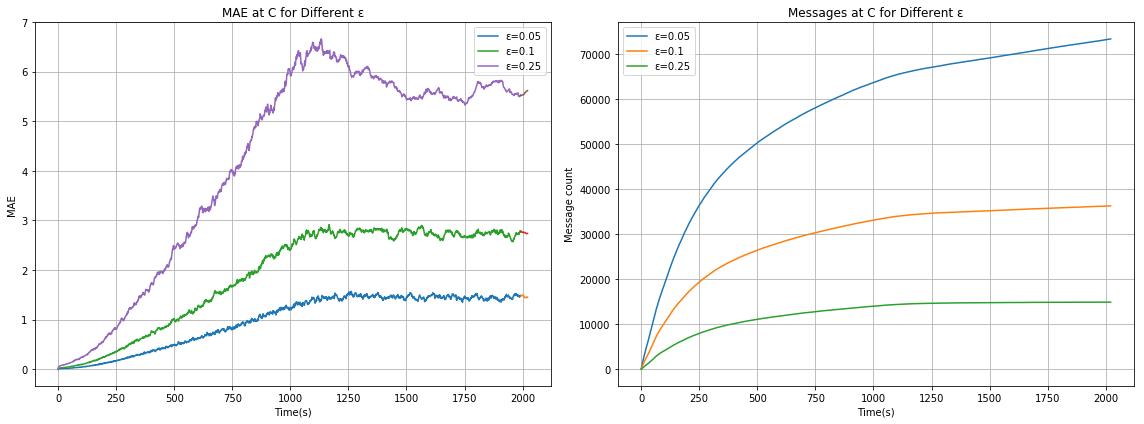

In [37]:
def main():
    file_path = 'cpu - csv.csv'
    columns,total_size,column_data = read_data(file_path)
    print(f"question 2：{total_size}")
    
    total_message = calculate_diff(columns,column_data)
    print(f"question 3：{total_message}")

    messages_sum,messages,error_values = calculate_ε_far_diff(columns,column_data,epsilon_values)
    for i, value in enumerate(messages_sum):
        print(f"question 4-{i+1}: {value}")
    
    MAE_values = calculate_MAE(error_values)
    print(MAE_values)
    
    MAE_C = calculate_MAE_at_C(error_values)
    messages_C = calculate_messages_at_C(messages)
    plot_mae_and_messages(epsilon_values, MAE_C, messages_C)

if __name__ == "__main__":
    main()
